In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [8]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

### Data Cleaning

In [9]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [10]:
df.shape 

(15, 2)

In [11]:
df.isnull().sum() 

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [12]:
df = df.drop_duplicates()

In [13]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [14]:
iqr = df['Ground Temperature'].quantile(0.75)-df['Ground Temperature'].quantile(0.25)

In [15]:
upper_threshold = df['Ground Temperature'].quantile(0.75) + 1.5 * iqr
lower_threshold = df['Ground Temperature'].quantile(0.25) - 1.5 * iqr

In [16]:
upper_threshold > df['Ground Temperature'].max()

True

In [17]:
lower_threshold < df['Ground Temperature'].min()

True

In [18]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

### EDA

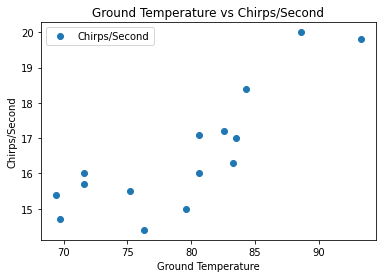

In [19]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')   
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [20]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


Splitting the Data

In [21]:
X = df.loc[:, ['Ground Temperature']].values
y = df.loc[:, 'Chirps/Second'].values 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Developing ML Model

In [22]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [23]:
regressor.intercept_

8.525215103489185

In [24]:
regressor.coef_

array([0.09479661])

### 1 . Linear regression equation for this data

In [74]:
print('y = {} * X + {}'.format(regressor.intercept_,regressor.coef_[0]))

y = 96.23253012756385 * X + 0.9653522271916011


### 2 . Chart the original data and the equation on the chart

Text(0, 0.5, 'Chirps/Second')

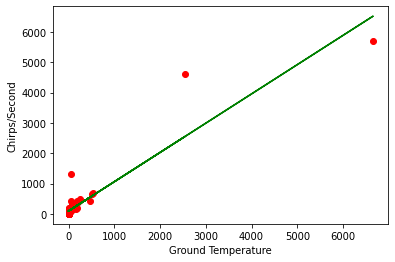

In [52]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='green')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')

### 3 . $R^2$ score

In [54]:
regressor.score(X,y)

0.8726314919456688

### 4 . if Ground Temperature = 95

In [55]:
output = regressor.predict([[95]])
output[0]

187.94099171076596

### 5 . if Chirping = 18

In [56]:
output = (18 - regressor.intercept_) / regressor.coef_  
output[0]

-81.04039947694285

In [57]:
y_pred = regressor.predict(X_test)

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [31]:
df = pd.read_fwf("brain_body.txt")

In [32]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


### Data Cleaning

In [33]:
df.isnull().sum() 

Brain    0
Body     0
dtype: int64

In [34]:
df = df.drop_duplicates()

In [35]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [36]:
iqr = df['Brain'].quantile(0.75)-df['Brain'].quantile(0.25)

In [37]:
upper_threshold = df['Brain'].quantile(0.75) + 1.5 * iqr
lower_threshold = df['Brain'].quantile(0.25) - 1.5 * iqr

In [38]:
upper_threshold > df['Brain'].max()

False

In [39]:
lower_threshold < df['Brain'].min()

True

In [40]:
df.dtypes

Brain    float64
Body     float64
dtype: object

### EDA

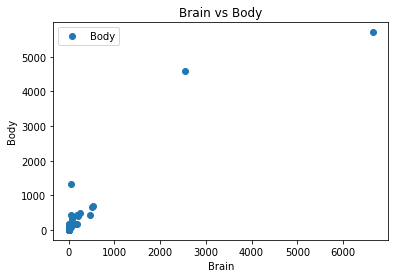

In [41]:
df.plot(x='Brain', y='Body', style='o')   
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [42]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


### Building ML Model

In [43]:
X = df.loc[:, ['Brain']].values
y = df.loc[:, 'Body'].values 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

In [45]:
regressor.intercept_

96.23253012756385

In [46]:
regressor.coef_

array([0.96535223])

### 1 . Linear regression equation for this data

In [47]:
print('y = {} * x + {}'.format(regressor.intercept_,regressor.coef_[0]))

y = 96.23253012756385 * x + 0.9653522271916011


### 2 . Chart the original data and the equation on the chart

Text(0, 0.5, 'Body')

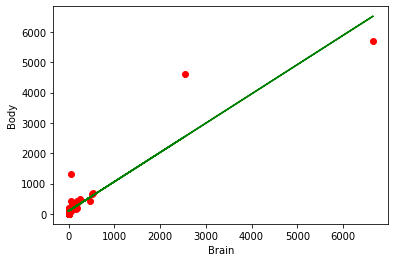

In [48]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='green')
plt.xlabel('Brain')
plt.ylabel('Body')

### 3 . $R^2$ score

In [49]:
regressor.score(X,y)

0.8726314919456688

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [50]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [58]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [59]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [60]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [61]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary

In [62]:
lr = linear_model.LinearRegression()
lr.fit(x, y)

LinearRegression()

In [63]:
print('Features & Coefficients')
print(list(zip(feature, lr.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [64]:
lr.intercept_

11410.14654725559

### 1 . Linear Equation

In [67]:
print('Linear Regression for {} with respect to Salary:\n'
          '{} + {}'.format(feature, lr.coef_,lr.intercept_))

Linear Regression for ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


### 2 . $R^2$ score

In [68]:
def lin_r2(feature, df, sal='Salary'):
    input = df[feature]
    output = df[sal]
    lr = linear_model.LinearRegression()
    lr.fit(input,output)
    return lr.score(input,output)

In [69]:
lin_r2(feature,df)

0.8547180674410969

In [70]:
import itertools as it

In [71]:
def get_combo(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combo(feature)

In [72]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_r2(list(n), df, focus)] = n
    return combo_scores

In [73]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

### $R^2$ score of all features is 0.8547

###3 . Report whether sex is a factor in salary

Sex has a score close to zero ( 0.06389892583288004 ) , indicating it has no direct influence on Salary 